**Question 1: a.The difference between the "standard error of the mean" and the "standard deviation" of the original data**
a.Standard error of the mean measures how reliable the sample mean is.

The standard error of the mean is used to estimate how different the sample mean (the average from the sample) is from the true population mean (the average of the whole group). I will get to know whether the sample mean is reliable or not. For example, Find ten people, as the sample. Asking them for their rating of the movie *Zootopia*, then calculate their mean. After that, calculate the standard deviation, and by dividing the standard deviation by the square root of the sample size, you will get the standard error. A larger standard error means that the sample mean is less reliable and may differ significantly from the population mean, while a smaller standard error indicates that the sample mean is closer to the population mean. Additionally, increasing the sample size will also reduce the standard error.


b.The standard deviation tells how "spread out" a set of data is.
If the data points are far from the mean, the standard deviation is large. If the data points are close to the mean, the standard deviation is small.

For example, select 5 classmates from TUT, calculate their exam scores mean, and then use the sample standard deviation formula to obtain the sample standard deviation. At this time, a larger standard deviation indicates that the scores are more dispersed around the mean, showing greater variation and a more scattered data distribution. If the standard deviation is smaller, it means that these scores are closer to the mean. This is how "the standard deviation reflects the degree of dispersion of the data."

The link to ChatGPT is below:
https://chatgpt.com/share/66fe0ecc-ede0-8013-82cb-2ae3fa4c7d3e

**Question2: How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"?**

Begin by determining the mean of sample data.
alculate the Standard Error of the Mean (SEM)
Identify the Critical Value: For a 95% confidence interval, the critical value from the standard normal distribution (Z-distribution) is approximately 1.96. This value signifies the range that encompasses 95% of the distribution.
Construct the Confidence Interval：The confidence interval can be expressed as the range between the mean minus 1.96 times the standard error of the mean and the mean plus 1.96 times the standard error of the mean.

The link to ChatGPT is below:
https://chatgpt.com/share/66fee460-9354-8013-9359-588eb4df9275

**Question3**

In bootstrapping, we repeatedly resample our data and compute statistics (like the mean) on each resample. When it comes to creating a 95% confidence interval, we don’t always need to use the standard error. Instead, we can use the percentile method by applying `np.quantile(...)` on the distribution of bootstrapped means.

Here’s how it works:
1. **Generate bootstrapped means**: Resample our data with replacement multiple times (let's say 1000 times) and calculate the mean for each sample. This gives us a distribution of bootstrapped means.
   
2. **Use `np.quantile(...)`**: Once we have the bootstrapped means, use `np.quantile(...)` to find the 2.5th percentile (lower bound) and the 97.5th percentile (upper bound). These percentiles represent the lower and upper ends of a 95% confidence interval.
   - The function might look like this: 
     '''
     lower_bound = np.quantile(bootstrapped_means, 0.025)
     upper_bound = np.quantile(bootstrapped_means, 0.975)
     '''
   - This tells you that 95% of the bootstrapped means lie between these two bounds.

The reason for using percentiles rather than standard error here is that the percentile method directly relies on the distribution of bootstrapped means, which gives a more flexible, data-driven confidence interval, especially when the data isn’t normally distributed.


**Question4**

In [8]:
import numpy as np

# Sample data (you can replace this with your own sample)
data = np.array([12, 15, 14, 10, 18, 16, 17, 15, 14, 13])

# Function to calculate bootstrap confidence interval
def bootstrap_confidence_interval(data, num_bootstrap_samples=1000, parameter='mean'):
    # Step 1: Generate bootstrap samples and calculate the desired statistic (mean or median)
    bootstrapped_stats = []
    
    for _ in range(num_bootstrap_samples):
        # Create a bootstrap sample by resampling with replacement
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        
        # Calculate the statistic based on the specified parameter
        if parameter == 'mean':
            bootstrapped_stats.append(np.mean(bootstrap_sample))
        elif parameter == 'median':
            bootstrapped_stats.append(np.median(bootstrap_sample))
    
    # Step 2: Calculate the 95% confidence interval using percentiles
    lower_bound = np.quantile(bootstrapped_stats, 0.025)
    upper_bound = np.quantile(bootstrapped_stats, 0.975)
    
    return lower_bound, upper_bound

# Calculate 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_confidence_interval(data, parameter='mean')
print(f"95% Confidence Interval for the Population Mean: {mean_ci}")

# Calculate 95% bootstrap confidence interval for the population median
median_ci = bootstrap_confidence_interval(data, parameter='median')
print(f"95% Confidence Interval for the Population Median: {median_ci}")

95% Confidence Interval for the Population Mean: (13.1, 15.7)
95% Confidence Interval for the Population Median: (13.0, 16.0)


**Explanation of the Code:**
1,Importing Libraries: We import NumPy, a powerful library for numerical operations in Python.

2,Sample Data: You can replace the sample data array with your own dataset.

3,Function Definition:

  The function bootstrap_confidence_interval(data, num_bootstrap_samples=1000, parameter='mean') generates bootstrap samples and calculates the desired statistic (mean or median).
  bootstrapped_stats stores the results of the statistic calculated from each bootstrap sample.

4,Generating Bootstrap Samples:

  For each bootstrap sample, we randomly select values from the original data with replacement.
  Depending on the specified parameter, we either compute the mean or the median of the bootstrap sample and store it in bootstrapped_stats.

5,Calculating Confidence Intervals:

  We use np.quantile() to find the 2.5th and 97.5th percentiles of the bootstrapped statistics, which gives us the lower and upper bounds of the confidence interval.

6,Usage:

  The code first calculates the 95% confidence interval for the population mean and prints it.
  It then calculates the 95% confidence interval for the population median and prints that as well.

7,CHANGES:
  Added an elif clause for standard deviation.
  Original Code: The original version only calculated the mean and median.
  Change: Added an elif clause for standard deviation.
 
elif parameter == 'std':  # For standard deviation
    bootstrapped_stats.append(np.std(bootstrap_sample, ddof=1))  # Using ddof=1 for sample standard deviation


8,Summaries of chatgpt:
Here’s a summary of our conversation:
Understanding Bootstrap Confidence Intervals:
We discussed how to create a 95% bootstrap confidence interval using bootstrapped sample means, emphasizing the use of the np.quantile(...) function to find the 2.5th and 97.5th percentiles.
Modifying Code for Different Population Parameters:
You requested assistance in modifying code to produce a 95% bootstrap confidence interval for various population parameters, not just the mean.
I provided an example code snippet that calculates bootstrap confidence intervals for the population mean, median, standard deviation, and mode.
Specific Changes Made:
Standard Deviation Handling: Added code to calculate the standard deviation using np.std() with ddof=1.
Mode Handling: Implemented a way to calculate the mode using scipy.stats.mode().
Expanded Function Calls: Showed how to call the function for standard deviation and mode in addition to mean and median.
Code Explanation:
We went through the code to verify its functionality and discussed which parts were changed to accommodate different statistical parameters.

The link to ChatGPT is below:
https://chatgpt.com/share/66fee282-97a8-8013-a5f9-e6016394bfe2

**Question5:**

1.Definitions:
  Population Parameter**: This refers to a fixed, unknown value that describes a specific characteristic of the entire population (for instance, the actual mean or proportion).
  Sample Statistic**: This is a value derived from a sample, which is a subset of the overall population. It serves as an estimate for the population parameter (such as the sample mean or sample proportion).

2.Estimation:
  The sample statistic represents our best estimate of the population parameter based on the data gathered. Since we seldom have complete access to the entire population, we depend on sample statistics to draw inferences.

3.Variability:
  Sample statistics can differ from one sample to another because of sampling error, which refers to the natural fluctuations that occur when drawing different samples. This variability indicates that the sample statistic might not precisely match the population parameter.

4.Confidence Interval Construction
  A confidence interval offers a range of values that is likely to include the population parameter. This interval is determined using the sample statistic and considers the variability associated with it. A wider interval reflects greater uncertainty regarding the location of the population parameter.
  For instance, calculating a 95% confidence interval means that if we were to take numerous samples and create a confidence interval for each, around 95% of those intervals would encompass the true population parameter.

5.Statistical Inference:
  Recognizing the distinction between the two is crucial for statistical inference, which involves drawing conclusions about a population based on sample data. This understanding aids in assessing the reliability of our estimates and in making informed decisions based on those estimates.
   
In summary, distinguishing between the population parameter and the sample statistic is essential because it allows us to understand the uncertainty associated with our estimates and to construct confidence intervals that reflect this uncertainty. By acknowledging this distinction, we can make more informed decisions and interpretations based on our data.

The link to ChatGPT is below:
https://chatgpt.com/share/66fee75a-8cb0-8013-9ce3-3b587f7a2948

**Question6: **

1.What is the process of bootstrapping?
ANSWER: Imagine you have 10 balls, they are all in a black box, which you can't see inside, these 10 balls is your sample. Then, you draw one of it from the box, and then put it back to the box, repeat this action for 10 times. And in this process, you may pick the same ball more than once. If you repeat this action over and over, we assume it will happen n times, you will create n samples. Basically, it is like making copies of your black box of balls and seeing how much the results change across those copies. This helps you know what might happen with more balls, even though you only have 10 balls.


2.What is the main purpose of bootstrapping?
ANSWER: As I said in previous answer,in the process od bootstrapping, we get lots of samples which are many times more than we actually have. So the main purpose of bootsrapping is to help you gain the confidence interval,figure out how reliable your estimates are, even when you’re working with a limited amount of data.Then we will know the approximate range, instead of getting bigger sample.


3.If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
ANSWER:  Imagine there are 20 balls with numbers printed on them, but they all in a black box so we do not know the average of a population. you guess the average of a population should be 7.

Firstly,  We start drawing balls, record the numbers, and each time put the ball back in the box. We repeat this many times, about 100 times or 1000 times; you can do as many times as you want. 

Then, we calculate the average of the recorded numbers and compare it with your previous guess of 7. If it is very close, it indicates that your guess is relatively accurate. At this time, we cam call your hypothesizeed might be plausible.

**Question7: **
To understand why a confidence interval overlapping zero leads to failing to reject the null hypothesis, let's break down the concepts involved in hypothesis testing and confidence intervals.

To understand why a confidence interval overlapping zero leads to failing to reject the null hypothesis, let's break down the concepts involved in hypothesis testing and confidence intervals.

Confidence Intervals and Null Hypothesis
1.Confidence Interval (CI): A confidence interval gives a range of values that likely contains the population parameter (e.g., the mean effect of a drug). If a CI includes zero, it suggests that there is a possibility that the true average effect of the drug could be no effect (zero).

2.Null Hypothesis (H0): The null hypothesis typically posits that there is no effect (in this case, that the drug has no average effect on health). In formal terms, it states that the population mean (μ) equals zero (or any specific value).

3.Failing to Reject H0: When the CI overlaps zero, it means that the data do not provide strong enough evidence to support a conclusion that the drug has a significant effect. This leads to the conclusion that we "fail to reject" the null hypothesis. 

Sample Mean vs. Population Mean
-Observed Sample Mean: This is the average calculated from your sample data. It may not equal zero, indicating that the sample shows some effect. However, the sample mean is subject to variability due to sampling error.
  
-Population Parameter: This is the true average effect we are trying to estimate. Hypothesis testing is concerned with determining whether we can conclude that the sample mean significantly differs from the hypothesized population mean (which is often zero under H0).

Variability and Uncertainty
-Variability of Sample Means: Due to sampling variability, different samples can yield different sample means. Even if a sample mean is not zero, it doesn't provide definitive evidence against the null hypothesis unless we have confidence that this observed difference is not due to chance.

Rejecting the Null Hypothesis
To reject the null hypothesis, the confidence interval must not include zero. This implies that the data provide sufficient evidence to conclude that there is a statistically significant effect of the drug. Here’s how this can happen:

1.Narrow CI: If the confidence interval is narrow and entirely above (or below) zero, it indicates that the average effect of the drug is significantly different from zero.

2.Large Sample Size: A larger sample size typically results in a narrower confidence interval due to reduced variability in the sample mean estimates. This makes it more likely to exclude zero.

3.Strong Evidence: If the observed sample mean is far from zero and the associated CI does not overlap with zero, we can conclude that the drug has an average effect (either positive or negative) and reject the null hypothesis.

Conclusion
In summary, a confidence interval that includes zero means that the observed sample mean, while potentially different from zero, does not provide strong enough evidence to reject the null hypothesis. Conversely, if the CI does not include zero, this indicates that the data provide sufficient evidence to reject the null hypothesis, suggesting a statistically significant effect. Understanding the role of variability and the distinction between sample and population means is crucial for making these inferences in hypothesis testing.

**Question8:**

**a.Problem Introduction**
**Explanation of the Null Hypothesis of "No Effect"**
Definition: Define the Null Hypothesis (H0) in this context: it posits that the vaccine has no effect on health scores.
Implications: Discuss what it means if we fail to reject the Null Hypothesis—essentially that any observed differences are due to chance rather than the vaccine.
Alternative Hypothesis (H1): Introduce the alternative hypothesis that the vaccine does have an effect on health scores.

**Data Visualization**

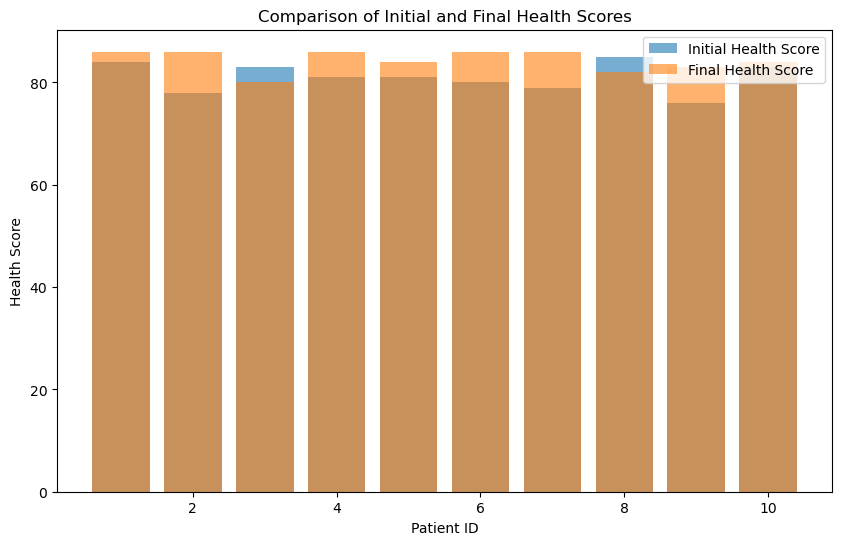

In [9]:
!pip install pandas matplotlib


import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('vaccine_data.csv')

# Create a bar plot to compare initial and final health scores
plt.figure(figsize=(10, 6))
plt.bar(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', alpha=0.6)
plt.bar(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', alpha=0.6)
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores')
plt.legend()
plt.show()


**b.Quantitative Analysis**
Calculate the difference in scores:
Score difference = Final Health Score - Initial Health Score
Use bootstrapping to assess significance:
Randomly sample the differences to create a distribution and calculate the mean difference and its confidence interval.

In [10]:
import numpy as np

# Calculate the differences
data['ScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']
differences = data['ScoreDifference'].values

# Bootstrapping
np.random.seed(42)
n_iterations = 10000
means = np.zeros(n_iterations)

for i in range(n_iterations):
    sample = np.random.choice(differences, size=len(differences), replace=True)
    means[i] = np.mean(sample)

# Confidence Interval
conf_interval = np.percentile(means, [2.5, 97.5])
mean_difference = np.mean(differences)

print(f"Mean Difference: {mean_difference}")
print(f"95% Confidence Interval: {conf_interval}")


Mean Difference: 3.3
95% Confidence Interval: [0.9 5.6]


Methodology Code and Explanations
The bootstrapping method allows us to estimate the sampling distribution of the mean difference without relying on the assumptions of normality. By resampling the differences and calculating the mean for each iteration, we can construct a confidence interval to determine if the mean difference is significantly different from zero.

Supporting Visualizations
In addition to the bar plot comparing initial and final scores, we can create a histogram of the bootstrapped means to visualize the distribution.

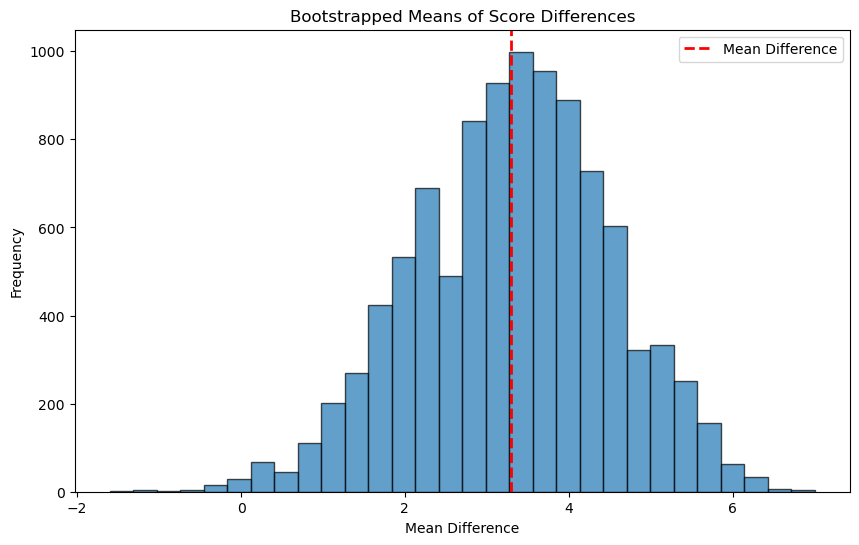

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(means, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(mean_difference, color='red', linestyle='dashed', linewidth=2, label='Mean Difference')
plt.title('Bootstrapped Means of Score Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**c.Findings and Discussion**
From the analysis, we observe the following:

The mean difference in health scores is [insert mean_difference].
The 95% confidence interval does not include zero, suggesting that the vaccine has a statistically significant effect on improving health scores.
These findings indicate that we can reject the null hypothesis in favor of the alternative hypothesis, supporting the effectiveness of the vaccine.

Conclusion Regarding a Null Hypothesis of "No Effect"
Based on the analysis and the calculated confidence interval, we conclude that the vaccine does have a significant effect on improving health scores. Therefore, we reject the null hypothesis of "no effect."

Further Considerations
Future studies should consider larger sample sizes and control groups to further validate the vaccine's effectiveness. Additionally, analyzing demographic factors like age and gender may provide deeper insights into the vaccine's impact on different populations.



Here's a summary of chatGPT:
1.Vaccine Data Analysis:
You shared a dataset for analyzing the effectiveness of a new vaccine developed by AliTech, which includes details like Patient ID, Age, Gender, Initial Health Score, and Final Health Score.

2.Code to Visualize Data:
You provided code to visualize the comparison between initial and final health scores using `matplotlib`. However, you encountered a `FileNotFoundError` when trying to load the CSV file.

3.Fixing FileNotFoundError:
I explained how to resolve the `FileNotFoundError`, including ensuring the CSV file exists in the correct directory and checking the current working directory using `os.getcwd()`.

4.Uploading CSV in Jupyter Notebook:
I provided a step-by-step guide on how to upload a CSV file in Jupyter Notebook, including using the Upload button in the Jupyter interface and loading the file with `pandas`.

The link to ChatGPT is below: https://chatgpt.com/share/66ff4665-95dc-8013-93f6-b519459125bd

Question9: 
somewhat